In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
part-3.1 - Первинне дослідження даних
part-3.2 - Пошук та сортування даних
part-3.3 - Агрегування даних та з'єднання таблиць
"""
# part-3.1 task-1

table = pd.read_csv("bestsellers with categories.csv")

In [3]:
# part-3.1 task-2

table.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# part-3.1 task-3

table.shape

(550, 7)

In [5]:
# part-3.1 task-4
# Про скільки книг зберігає дані датасет?

print("Відповідь: 550 книг")

Відповідь: 550 книг


In [6]:
# part-3.1 task-5

table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [7]:
# part-3.1 task-6

table.isnull().sum()/table.shape[0]

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

In [8]:
# part-3.1 task-7
# Чи є в якихось змінних пропуски?
print("Відповідь: Ні")

Відповідь: Ні


In [9]:
# part-3.1 task-8
table["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [10]:
# part-3.1 task-9
# Які є унікальні жанри?
print("Відповідь: Non Fiction, Fiction")

Відповідь: Non Fiction, Fiction


<Axes: ylabel='Frequency'>

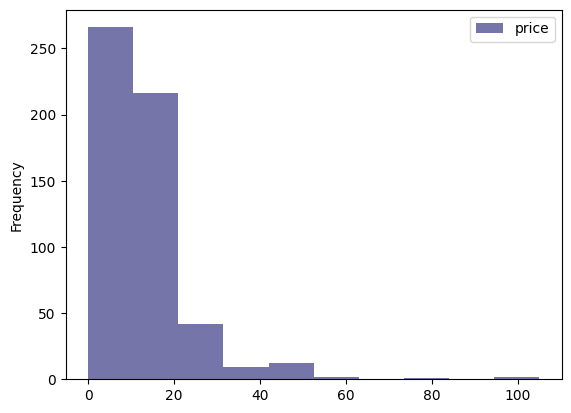

In [11]:
# part-3.1 task-10

chart = table['price'].plot(kind="hist",
                            color="midnightblue",
                                   legend=True,
                                   alpha=0.6
                           )
chart

In [12]:
# part-3.1 task-11

max_price = table['price'].max()
min_price = table['price'].min()
mean_price = table['price'].mean()
median_price = table['price'].median()

In [13]:
# part-3.1 task-12
# Максимальна ціна?
print(f"Відповідь: Максимальна ціна - {max_price} USD")

Відповідь: Максимальна ціна - 105 USD


In [14]:
# part-3.1 task-13
# Мінімальна ціна?
print(f"Відповідь: Мінімальна ціна - {min_price} USD")

Відповідь: Мінімальна ціна - 0 USD


In [15]:
# part-3.1 task-14
# Середня ціна?
print(f"Відповідь: Середня ціна - {mean_price} USD")

Відповідь: Середня ціна - 13.1 USD


In [16]:
# part-3.1 task-15
# Медіанна ціна?
print(f"Відповідь: Медіанна ціна - {median_price} USD")

Відповідь: Медіанна ціна - 11.0 USD


In [17]:
# part-3.2 task-1
# Який рейтинг у датасеті найвищий? 
max_rating = table['user_rating'].max()
print(f"Відповідь: найвищий рейтинг - {max_rating}")

Відповідь: найвищий рейтинг - 4.9


In [18]:
# part-3.2 task-2
# Скільки книг мають такий рейтинг?
books_max_rating = table[table['user_rating'] == table['user_rating'].max()].shape
result = books_max_rating[0]
print(f"Відповідь: Кількість книг з максимальним рейтингом - {result}")

Відповідь: Кількість книг з максимальним рейтингом - 52


In [19]:
# part-3.2 task-3
# Яка книга має найбільше відгуків?
max_reviews = table[table['reviews'] == table['reviews'].max()]["name"]
print(f"Відповідь: книга з найбільшою кількістю відгуків - {max_reviews}")

Відповідь: книга з найбільшою кількістю відгуків - 534    Where the Crawdads Sing
Name: name, dtype: object


In [20]:
# part-3.2 task-4
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
top50_2015 = table[table["year"] == 2015]
book_max_price_2015 = top50_2015[top50_2015['price'] == top50_2015['price'].max()]['name']
print(f"Відповідь: найдорожча книга у 2015 році - {book_max_price_2015}")

Відповідь: найдорожча книга у 2015 році - 277    Publication Manual of the American Psychologic...
Name: name, dtype: object


In [21]:
# part-3.2 task-5
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
books_fiction_2010 = table[(table["genre"] == 'Fiction') & (table["year"] == 2010)].shape
print(f"Відповідь: до рейтингу Топ-50 за 2010 рік потрапило книг жанру Fiction - {books_fiction_2010[0]}")

Відповідь: до рейтингу Топ-50 за 2010 рік потрапило книг жанру Fiction - 20


In [22]:
# part-3.2 task-6
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
max_rating_in_2010_2011 = table.loc[((table['year'] == 2010)|(table['year'] == 2011))&(table['user_rating'] == 4.9)].shape
print(f"Відповідь: до рейтингу Топ-50 за 2010 та 2011 рік потрапило книг з рейтингом 4.9 - {max_rating_in_2010_2011[0]}")

Відповідь: до рейтингу Топ-50 за 2010 та 2011 рік потрапило книг з рейтингом 4.9 - 1


In [23]:
# part-3.2 task-7
sorted_table = top50_2015[top50_2015['price'] < 8].sort_values('price')
sorted_table

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [24]:
# part-3.2 task-8
# Яка книга остання у відсортованому списку?
last = sorted_table.tail(1)['name']
print(f"Відповідь: остання книга у рейтингу за 2015 дешевше за 8 доларів - {last}")

Відповідь: остання книга у рейтингу за 2015 дешевше за 8 доларів - 253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object


In [25]:
# part-3.3 task-1
new_dt_fr = table.groupby(['genre']).agg({'price': ['min', 'max']})
new_dt_fr

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [26]:
# part-3.3 task-2
# Максимальна ціна для жанру Fiction
solution = new_dt_fr.loc['Fiction'].max()
print(f"Відповідь: {solution}")

Відповідь: 82


In [27]:
# part-3.3 task-3
# Мінімальна ціна для жанру Fiction
solution = solution = new_dt_fr.loc['Fiction'].min()
print(f"Відповідь: {solution}")

Відповідь: 0


In [28]:
# part-3.3 task-4
# Максимальна ціна для жанру Non Fiction
solution = new_dt_fr.loc['Non Fiction'].max()
print(f"Відповідь: {solution}")

Відповідь: 105


In [30]:
# part-3.3 task-5
# Мінімальна ціна для жанру Non Fiction
solution = new_dt_fr.loc['Non Fiction'].min()
print(f"Відповідь: {solution}")

Відповідь: 0


In [32]:
# part-3.3 task-6
new_dt_fr_2 = table.groupby("author")["name"].agg(["count"])
new_dt_fr_2

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [34]:
# part-3.3 task-7
# Якої розмірності вийшла таблиця?
rows, columns = new_dt_fr_2.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")

Кількість рядків: 248
Кількість стовпців: 1


In [35]:
# part-3.3 task-8
# Який автор має найбільше книг?
new_dt_fr_3 = table.groupby(['author'])['name'].count().sort_values().tail(1)
print(f"Відповідь: {new_dt_fr_3}")

Відповідь: author
Jeff Kinney    12
Name: name, dtype: int64


In [36]:
# part-3.3 task-9
# Скільки книг цього автора?
solution = new_dt_fr_3[0]
print(f"Відповідь: {solution}")

Відповідь: 12


C:\Users\PC\AppData\Local\Temp\ipykernel_12132\50081105.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  solution = new_dt_fr_3[0]


In [38]:
# part-3.3 task-10
new_dt_fr_4 = table.groupby(['author'])['user_rating'].agg(['mean'])
new_dt_fr_4_sorted = new_dt_fr_4.sort_values(by=['mean'])
new_dt_fr_4_sorted

,mean
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


In [39]:
# part-3.3 task-11
# У якого автора середній рейтинг мінімальний?
solution = new_dt_fr_4_sorted.head(1)
print(f"Відповідь: {solution}")

Відповідь:              mean
author           
Donna Tartt   3.9


In [40]:
# part-3.3 task-12
# Який у цього автора середній рейтинг?
solution = new_dt_fr_4_sorted.min()
print(f"Відповідь: {solution}")

Відповідь: mean    3.9
dtype: float64


In [42]:
# part-3.3 task-13
new_dt_fr_5 = pd.concat([new_dt_fr_2, new_dt_fr_4], axis=1)
new_dt_fr_5

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [46]:
# part-3.3 task-14
dt_fr_5_sorted = new_dt_fr_5.sort_values(by=['count', 'mean'])
dt_fr_5_sorted

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [48]:
# part-3.3 task-15
# Який автор перший у списку?
solution = dt_fr_5_sorted.head(1)
print(f"Відповідь: {solution}")

Відповідь:                 count  mean
author                     
Muriel Barbery      1   4.0
